In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Data
data = pd.read_csv('chennai_house_price_prediction.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [3]:
x=data.drop(['SALES_PRICE'],axis=1)
y=data['SALES_PRICE']
x.shape,y.shape

((7109, 18), (7109,))

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [5]:
from sklearn.linear_model import LinearRegression as LR
#from sklearn.metrics import root_mean_log_squared_error as rmlse

In [6]:
data.describe()#Only for cont.

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


In [9]:
data.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P09736,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


In [7]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [16]:
temp = pd.DataFrame(index=data.columns)
temp['data_types']=data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_types,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


Text(0.5, 0, 'Sales')

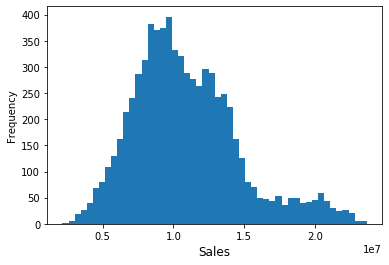

In [17]:
data['SALES_PRICE'].plot.hist(bins=50)
plt.xlabel('Sales',fontsize=12)

Text(0.5, 0, 'Sales')

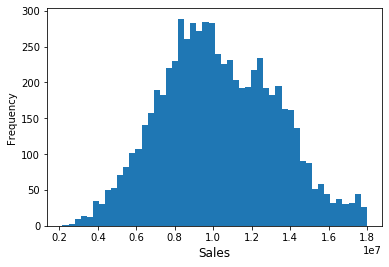

In [19]:
(data['SALES_PRICE'].loc[data['SALES_PRICE']<18000000]).plot.hist(bins=50)
plt.xlabel('Sales',fontsize=12)

Text(0.5, 0, 'Area in sq feet')

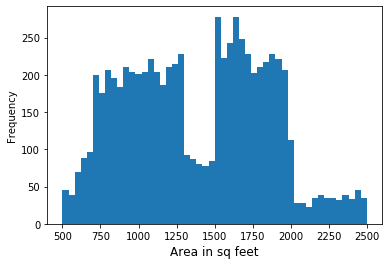

In [20]:
data['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

In [22]:
data['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [23]:
data['N_BEDROOM'].value_counts()/len(data)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

In [24]:
data['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [27]:
data['N_BATHROOM'].value_counts()/len(data)*100

1.0    78.618652
2.0    21.311014
Name: N_BATHROOM, dtype: float64

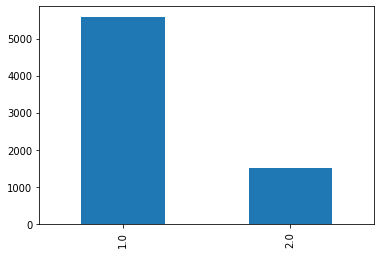

In [28]:
data['N_BATHROOM'].value_counts().plot(kind = 'bar')

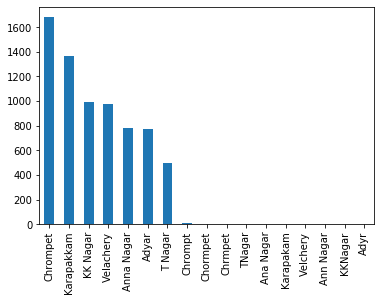

In [29]:
data['AREA'].value_counts().plot(kind = 'bar')

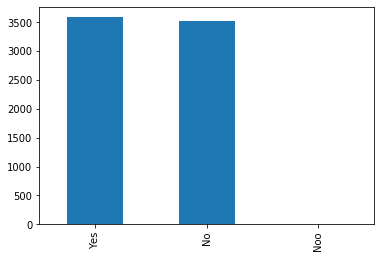

In [30]:
data['PARK_FACIL'].value_counts().plot(kind = 'bar')

In [31]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [32]:
data.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [9]:
data.drop_duplicates().shape

(7109, 19)

In [10]:
data.drop_duplicates(subset=['AREA']).shape

(17, 19)

In [11]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [12]:
data.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [13]:
data.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


In [14]:
data['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [15]:
data['N_BEDROOM'].fillna(value = (data['N_BEDROOM'].mode()[0]), inplace=True)

In [16]:
data.loc[data['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [17]:
for i in range(0,len(data)):
    if pd.isnull(data['N_BATHROOM'][i])==True:
        if data['N_BATHROOM'][i]==1.0:
            data['N_BATHROOM'][i]=1.0
        else:
            data['N_BATHROOM'][i]=2.0

C:\Users\SaiKiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [25]:
temp = (data['QS_ROOMS'] + data['QS_BATHROOM'] + data['QS_BEDROOM'])/3
pd.concat([data['QS_ROOMS'], data['QS_BATHROOM'], data['QS_BEDROOM'], temp],axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,0
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


In [28]:
data.loc[data['QS_OVERALL'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
15,P06328,Velachery,1868,148,3.0,2.0,5,Family,No,Commercial,NoSewr,Gravel,RH,3.8,3.8,3.1,NaN,188569,15714080
46,P09483,T Nagar,1882,189,2.0,1.0,5,AbNormal,Yes,Others,ELO,Gravel,RM,3.9,4.5,4.7,NaN,272877,16051580
86,P00545,Chrompet,1085,149,1.0,1.0,3,AbNormal,Yes,Commercial,NoSewr,Gravel,RL,2.8,3.8,4.6,NaN,100545,14363500
111,P06768,Adyar,1034,73,1.0,1.0,3,AdjLand,Yes,Others,ELO,Gravel,C,3.8,3.3,3.5,NaN,46284,9256740
134,P00089,T Nagar,1942,10,2.0,1.0,5,Family,No,House,NoSeWa,Gravel,RH,4.6,3.1,2.9,NaN,61654,12330740
143,P06226,Karapakkam,1430,17,2.0,2.0,4,AbNormal,Yes,Others,NoSewr,No Access,A,4.3,3.2,3.8,NaN,106172,6635750
161,P06964,Velachery,1824,187,3.0,2.0,5,Normal Sale,No,House,NoSewr,Paved,I,3.9,2.3,4.1,NaN,76942,8549060
186,P08752,Adyar,738,69,1.0,1.0,2,Partial,No,Commercial,NoSewr,No Access,I,2.4,4.7,5.0,NaN,8313,8312670
208,P03292,Karapakkam,1578,153,2.0,2.0,4,Normal Sale,Yes,Others,AllPub,Gravel,I,4.3,4.6,3.4,NaN,238313,9532500
248,P04891,Velachery,1776,120,2.0,1.0,4,Normal Sale,Yes,House,NoSeWa,Paved,RH,4.9,2.4,3.4,NaN,89903,9989170


In [29]:
data.loc[data['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [30]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [31]:
data['QS_OVERALL']=data.apply(lambda x:fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'],axis=1)

In [34]:
data.isnull().sum()


PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [36]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [37]:
data = data.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [38]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [40]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************Value count in',i,'********')
    print(data[i].value_counts())

************Value count in AREA ********
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64
************Value count in N_BEDROOM ********
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
************Value count in N_BATHROOM ********
1.0    5589
2.0    1520
Name: N_BATHROOM, dtype: int64
************Value count in N_ROOM ********
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64
************Value count in SALE_COND ********
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64
*********

In [42]:
data['PARK_FACIL'].replace({'Noo':'No'},inplace = True)
data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [43]:
data['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)
data['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [44]:
data['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
data['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [45]:
data['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
data['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)


In [46]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

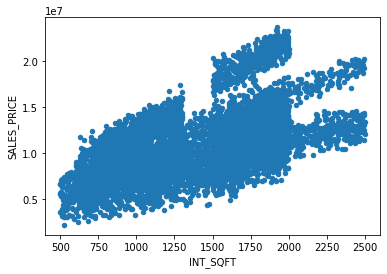

In [47]:
data.plot.scatter('INT_SQFT','SALES_PRICE')

In [50]:
data['BUILDTYPE'].head()

0    Commercial
1    Commercial
2    Commercial
3        Others
4        Others
Name: BUILDTYPE, dtype: object

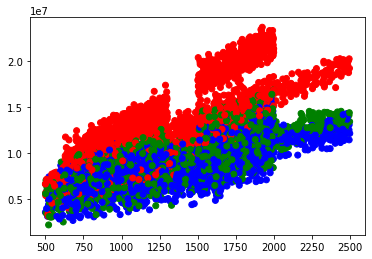

In [55]:
fig,ax=plt.subplots()
colors={'Commercial':'red','Others':'green','House':'blue'}
ax.scatter(data['INT_SQFT'], data['SALES_PRICE'],c=data['BUILDTYPE'].apply(lambda x:colors[x]))
plt.show()

In [57]:
data.pivot_table(values='SALES_PRICE',index='N_BEDROOM',columns='N_BATHROOM',aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,9747670.0
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


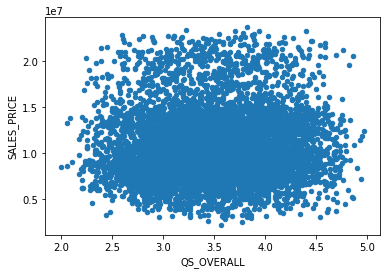

In [58]:
data.plot.scatter('QS_OVERALL', 'SALES_PRICE')

Text(0.5, 1.0, 'QS_OVERALL')

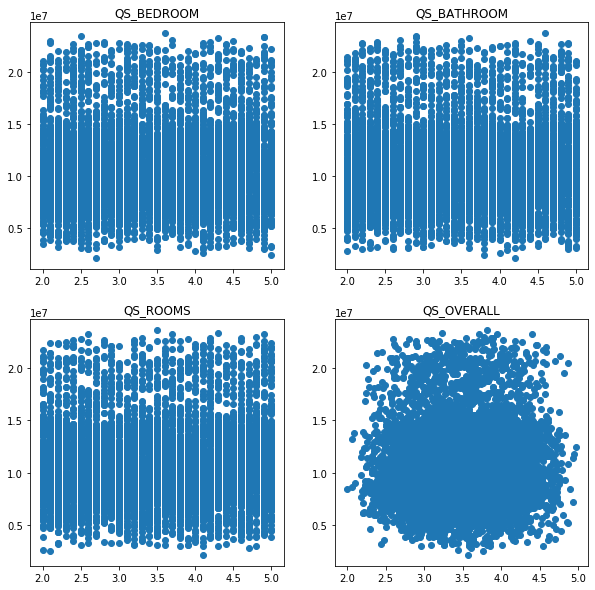

In [59]:
fig, axs = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axs[0, 0].scatter(data['QS_BEDROOM'], data['SALES_PRICE'])    # QS_BEDROOM and sale price
axs[0, 0].set_title('QS_BEDROOM')

axs[0, 1].scatter(data['QS_BATHROOM'], data['SALES_PRICE'])   # QS_BATHROOM and price
axs[0, 1].set_title('QS_BATHROOM')

axs[1, 0].scatter(data['QS_ROOMS'], data['SALES_PRICE'])    # QS_ROOMS and sale price
axs[1, 0].set_title('QS_ROOMS')

axs[1, 1].scatter(data['QS_OVERALL'], data['SALES_PRICE'])    # QS_OVERALL and sale price
axs[1, 1].set_title('QS_OVERALL')


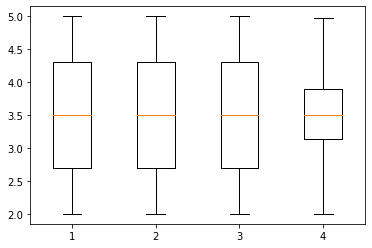

In [62]:
ax = plt.figure().add_subplot(111)
bp = ax.boxplot([data['QS_BEDROOM'], data['QS_ROOMS'], data['QS_BATHROOM'], data['QS_OVERALL']])

In [63]:
data.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

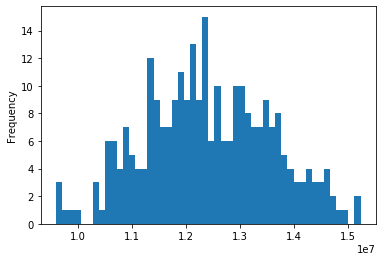

In [65]:
temp_data=data.loc[(data['BUILDTYPE']=='House')&(data['AREA']=='Anna Nagar')]
temp_data['SALES_PRICE'].plot.hist(bins=50)

In [66]:
data.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

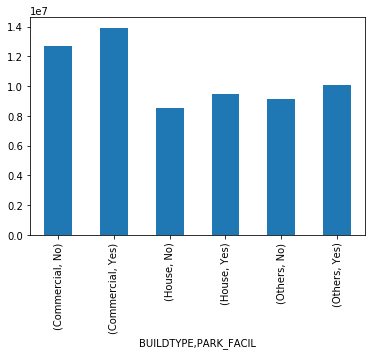

In [68]:
temp=data.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()
temp.plot(kind='bar',stacked=True)

In [69]:
data.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Adyar,8878350
Anna Nagar,13727895
Chrompet,9606725
KK Nagar,12146740
Karapakkam,7043125
T Nagar,14049650
Velachery,10494410


In [70]:
data[['SALES_PRICE', 'COMMIS']].corr()

,SALES_PRICE,COMMIS
SALES_PRICE,1.000000,0.626275
COMMIS,0.626275,1.000000


In [71]:
data.drop(['PRT_ID'],axis=1,inplace=True)

In [72]:
data=pd.get_dummies(data)

In [73]:
x = data.drop('SALES_PRICE', axis=1)
y= data['SALES_PRICE']

In [74]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.3, random_state = 2)

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((4976, 48), (2133, 48), (4976,), (2133,))

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

In [76]:
lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
train_pred=lreg.predict(train_x)
train_score=np.sqrt(mean_squared_log_error(train_y,train_pred))

In [79]:
pred_test = lreg.predict(valid_x)
valid_score=np.sqrt(mean_squared_log_error(valid_y,pred_test))

In [80]:
print('Training score:', train_score)
print('Validation score:', valid_score)

Training score: 0.09098847516091332
Validation score: 0.09461988671046914
